# Introdução ao algorítmo NAIVE BAYES:

## 1.0 Introdução

### 1.1 Definições

* Em construção


### 1.2 Pontos Positivos

* Em Construção

### 1.3 Pontos Negativos

* Em Construção

## 2.0 Base de Dados

Para este experimento, vamos utilizar a base de dados "Iris flower". Esses conjuntos de dados consistem em 3 tipos diferentes de comprimento de pétala e sépala de íris (Setosa, Versicolour e Virginica), armazenados em um numpy.ndarray de 150 x 4

As linhas são as amostras e as colunas são: Comprimento da Sépala, Largura da Sépala, Comprimento da Pétala e Largura da Pétala.

<img src='Iris.png'>

* 50 amostras de 3 espécies diferentes de íris (total de 150 amostras)
* Medidas: comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala
* O formato dos dados: (comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala)

Descrição:
* sepal_length: Comprimento da sépala, em centímetros, usado como entrada.
* sepal_width: Largura da sépala, em centímetros, usada como entrada.
* petal_length: Comprimento da pétala, em centímetros, usado como entrada.
* petal_width: Largura da pétala, em centímetros, usada como entrada.
* classe: Iris Setosa, Versicolor ou Virginica, usada como alvo.

### 2.1 Carregando os dados

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits.mplot3d
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = iris.target_names[df['target']]

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


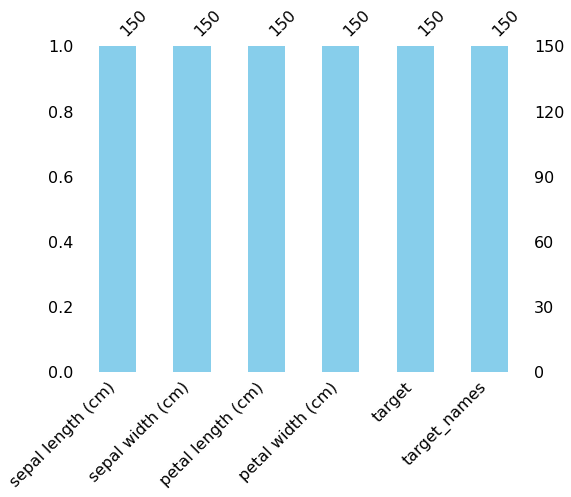

In [5]:
import missingno as msno
msno.bar(df,figsize=(8,6),color='skyblue')
plt.show()

### 2.2 Verificando a distribuição de Classes

Nesta etapa, é importante verificar se a base de dados possui distribuição de dados balanceada entre classes, pois a performance dos modelos são dependentes de alguns fatores sobre os dados, tais como:
* Seleção de amostra.
* Composição.
* Pureza.
* Tamanho

Referência:
USTUNER, M.; SANLI, F. B.; ABDIKAN, SAYGIN. BALANCED VS IMBALANCED TRAINING DATA: CLASSIFYING RAPIDEYE DATA WITH SUPPORT VECTOR MACHINES. International Archives of the Photogrammetry, Remote Sensing & Spatial Information Sciences, v. 41, 2016.

In [6]:
df.groupby('target_names').size()

target_names
setosa        50
versicolor    50
virginica     50
dtype: int64

Nota-se que na base de dados Iris, as classes estão bem distribuidas, porém teremos mais detalhes na análise exploratória de dados.

### 2.3 Análise Exploratória dos dados

### Box plot

Um boxplot (ou diagrama de caixa, numa tradução livre) mostra a distribuição quantitativa dos dados de um jeito que facilita a comparação entre as variáveis, ou através dos níveis categóricos das variáveis.

Essa caixa (“box”) mostra os quartis do dataset enquanto os “whiskers” mostram o resto da distribuição, exceto os pontos que são chamados de outliers.

<img src='BoxPlot.png'>

<Figure size 432x288 with 0 Axes>

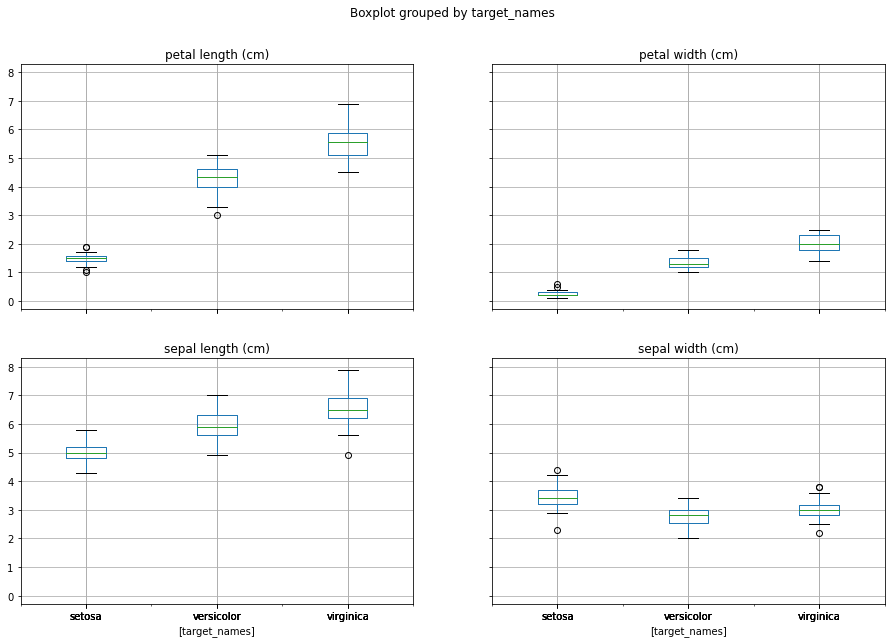

In [7]:
plt.figure()
df.drop("target", axis=1).boxplot(by="target_names", figsize=(15, 10))
plt.show()

### Gráfico de coordenadas paralelas.

Para dados não tão densos, uma forma de observar a relação entre classes é através do gráfico de coordenadas paralelas. 

Esse tipo de visualização é usado para plotar dados numéricos multivariados. Os Gráficos de Coordenadas Paralelas são ideais para comparar muitas variáveis juntas e ver as relações entre elas. Por exemplo, se você tivesse que comparar uma variedade de produtos com os mesmos atributos (comparando especificações de computador ou carro em diferentes modelos).

Para mais detalhes, acessar o recurso: https://datavizcatalogue.com/methods/parallel_coordinates.html

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

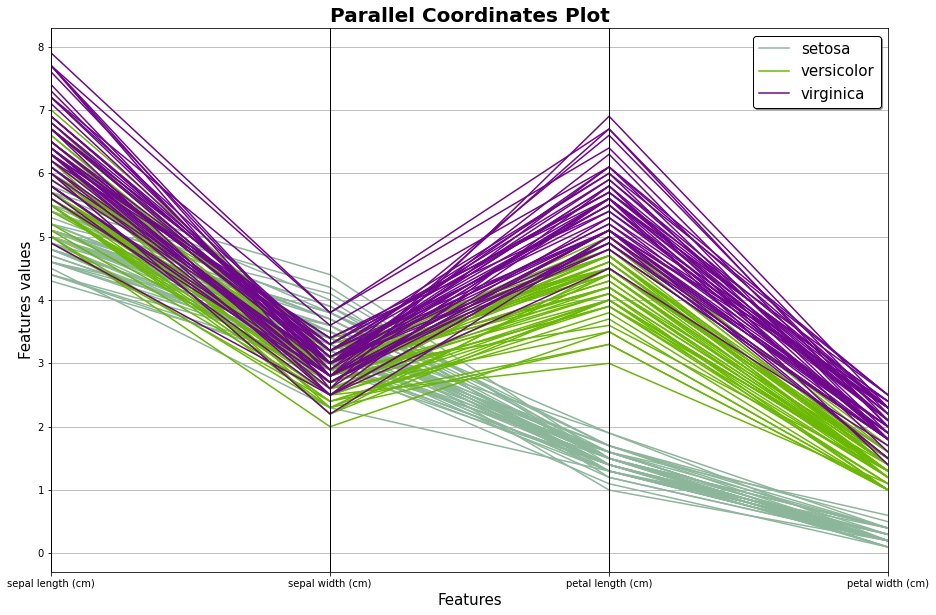

In [9]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df.drop("target", axis=1), "target_names")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [10]:
#
#from pandas.plotting import andrews_curves
#plt.figure(figsize=(15,10))
#andrews_curves(df.drop("target", axis=1), "target_names")
#plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
#plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
#plt.show()

### Pair Plot

Um gráfico "pair plot" é um gráfico com subgráficos onde cada subgráfico representa uma distribuição bivariada de duas variáveis no conjunto de dados fornecido.

Referência técnica: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [2]:
from IPython.display import HTML

HTML("""
<video width="578" height="361"
       src="./Pair_Plot.mp4"  
       controls>
</video>
""")

C:\Users\s1149592\Anaconda3\envs\ic_mackenzie\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

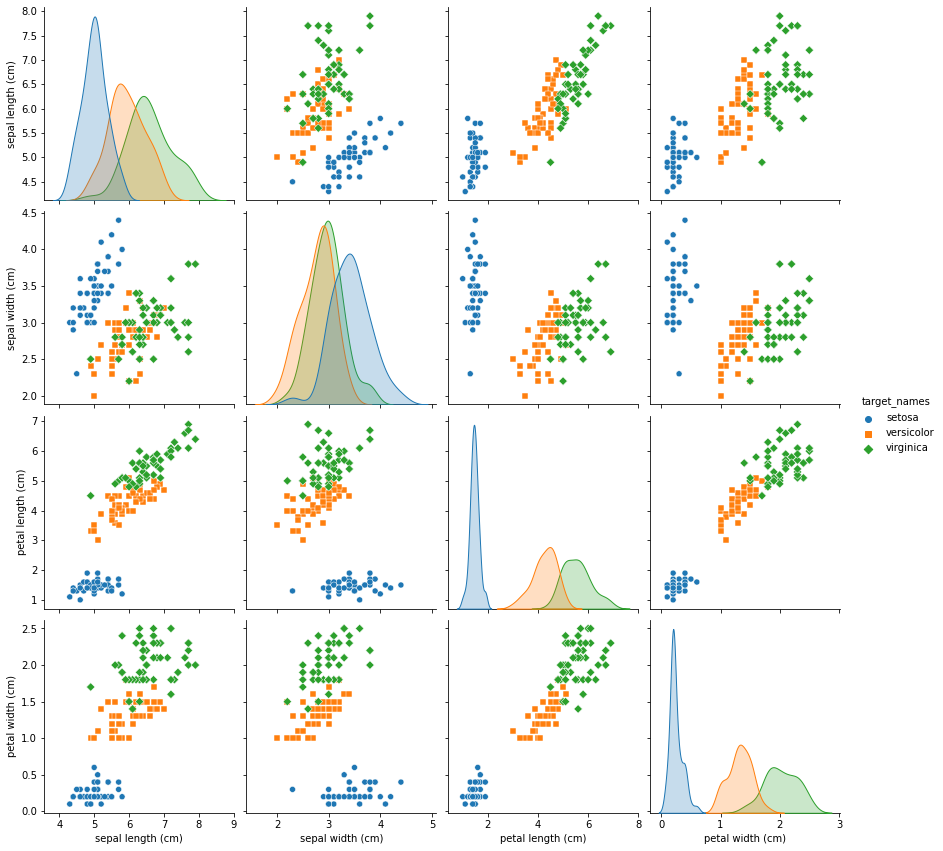

In [12]:
plt.figure()
sns.pairplot(df.drop("target", axis=1), hue = "target_names", size=3, markers=["o", "s", "D"])
plt.show()

### Violin

Violin Plot é um método para visualizar a distribuição de dados numéricos de diferentes variáveis. É semelhante ao Box Plot, mas com um gráfico girado em cada lado, fornecendo mais informações sobre a estimativa de densidade no eixo y. A densidade é espelhada e invertida e a forma resultante é preenchida, criando uma imagem semelhante a um violino. A vantagem de um gráfico de violino é que ele pode mostrar nuances na distribuição que não são perceptíveis em um boxplot. Por outro lado, o boxplot mostra mais claramente os outliers nos dados.

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


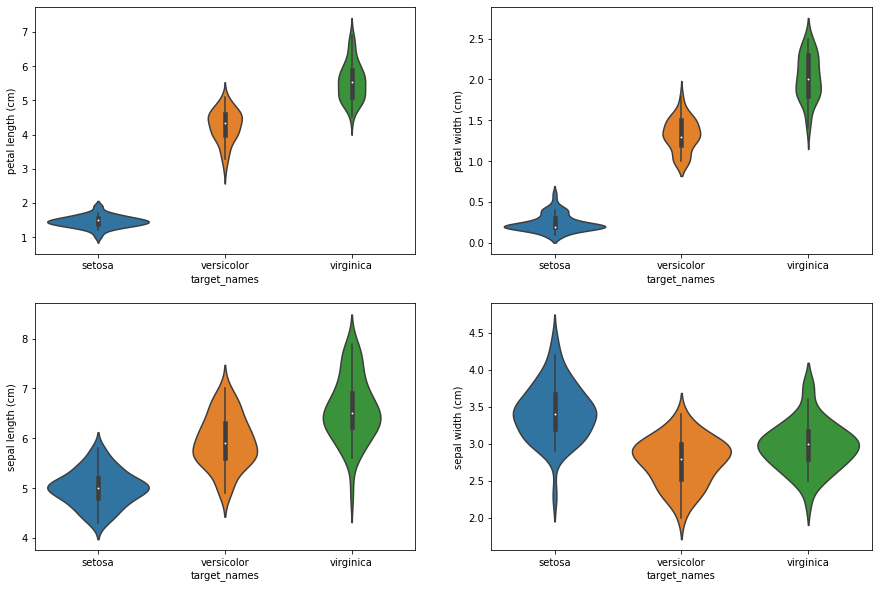

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target_names',y='petal length (cm)',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target_names',y='petal width (cm)',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target_names',y='sepal length (cm)',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target_names',y='sepal width (cm)',data=df)
plt.show()

C:\Users\s1149592\Anaconda3\envs\ic_mackenzie\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\s1149592\Anaconda3\envs\ic_mackenzie\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\s1149592\Anaconda3\envs\ic_mackenzie\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


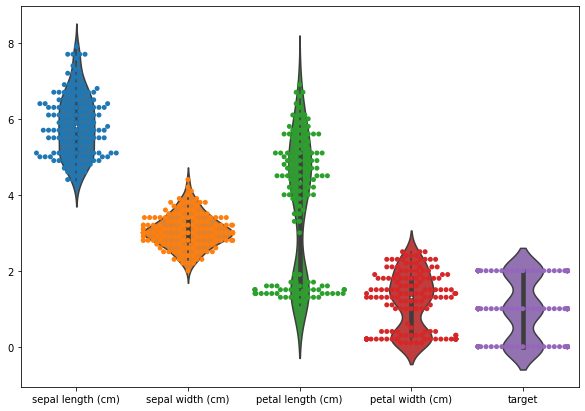

In [17]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=df)
sns.swarmplot( data=df)
plt.show()

### Area Plot

O Area Plot nos dá uma representação visual de várias dimensões da flor Iris e seu alcance no conjunto de dados.

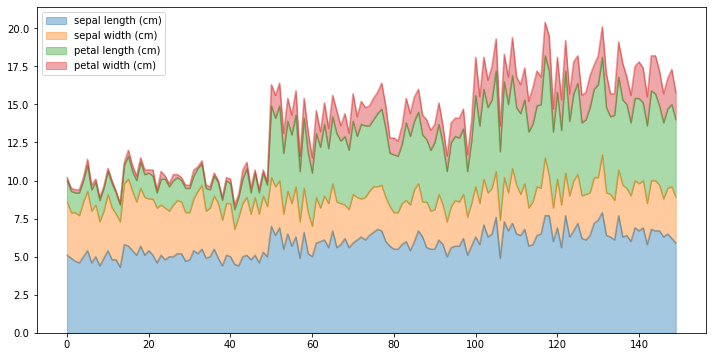

In [20]:
df.plot.area(y=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],alpha=0.4,figsize=(12, 6));

### Correlações

<img src='corr.svg'>

Agora, quando treinamos qualquer algoritmo, o número de recursos e sua correlação desempenham um papel importante. Se houver recursos e muitos deles forem altamente correlacionados, o treinamento de um algoritmo com todos os recursos reduzirá a precisão. Assim, a seleção de recursos deve ser feita com cuidado. Este conjunto de dados tem menos recursos, mas ainda veremos a correlação.

In [27]:
df[df.columns[0:4]].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


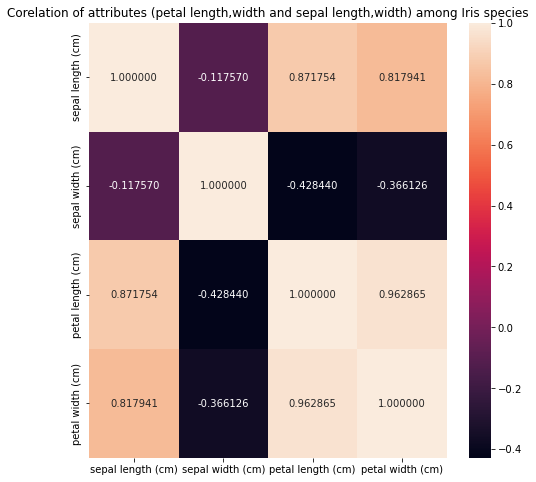

In [28]:
plt.subplots(figsize = (8,8))
sns.heatmap(df[df.columns[0:4]].corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

A Largura e o Comprimento da Sépala não estão correlacionados A Largura e o Comprimento da Pétala estão altamente correlacionados


## 3.0 Preparando os dados

In [29]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [30]:
iris_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [31]:
X = df[iris_features]
y = df.target

A função train_test_split do Sklearn nos ajuda a criar nossos dados de treinamento e dados de teste. Isso ocorre porque, normalmente, os dados de treinamento e os dados de teste vêm do mesmo conjunto de dados original. Para obter os dados para construir um modelo, começamos com um único conjunto de dados e depois o dividimos em dois conjuntos de dados: treinar e testar.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 4.0 Construindo o modelo NAIVE BAYES

Um pouco do conceito do algoritmo Naive Bayes com StatsQuest

In [1]:
HTML('<iframe width="642" height="361" src="https://www.youtube.com/embed/O2L2Uv9pdDA" title="Naive Bayes, Clearly Explained!!!" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

NameError: name 'HTML' is not defined

Naive Bayes é um algoritmo de classificação para problemas de classificação binária (duas classes) e multiclasses. A técnica é mais fácil de entender quando descrita usando valores de entrada binários ou categóricos.

É chamado de Bayes ingênuo ou Bayes idiota porque o cálculo das probabilidades para cada hipótese é simplificado para tornar seu cálculo tratável. Em vez de tentar calcular os valores de cada valor de atributo P(d1, d2, d3|h), eles são considerados condicionalmente independentes dado o valor alvo e calculados como P(d1|h) * P(d2|H) e breve.

Esta é uma suposição muito forte que é muito improvável em dados reais, ou seja, que os atributos não interagem. No entanto, a abordagem funciona surpreendentemente bem em dados em que essa suposição não é válida.


<img src='nb.jpg'>



### 4.1 KNN-Playground

... Buscando

### 4.2 Construindo o Modelo

In [36]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


## Matriz de Confusão

<AxesSubplot:>

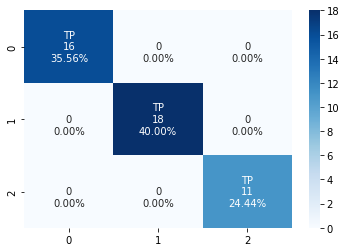

In [37]:
group_names = ['TP','','','','TP','','','', 'TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [39]:
accuracy = accuracy_score(y_test, Y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


# Referências

* Kaggle: https://www.kaggle.com/code/vinayshaw/iris-species-100-accuracy-using-naive-bayes